# Linear Regression Assignment
# Author : Prachi Jain
# Date : 5 October 2019

In [1]:
# Importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Inserting line magic functions to avoid plt.show()
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#importing libraries for Linear regression Modelling
import statsmodels.api as sm

# Suppress warnings
# import warnings
# warnings.filterwarnings('ignore')

## Business Objectives

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

 - Which variables are significant in predicting the price of a car
 - How well those variables describe the price of a car
 
## Business Goal 

The objective of this assignment is to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Performing EDA on the data

### 1) Reading and Understanding the data

In [2]:
# Reading csv File and checking the shape
car_data=pd.read_csv("CarPrice_Assignment.csv")
car_data.shape # Rows=205 Cols=26

(205, 26)

In [3]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Detailed Information on the columns

In [4]:
car_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### 2) Data Cleaning and Preparation

In [5]:
# Extracting car company from carname
car_data["carcompany"] = car_data["CarName"].apply(lambda x: x.split(" ")[0])
car_data["carcompany"].head(10)

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: carcompany, dtype: object

In [6]:
# dropping the carname col since carcompany will be used in modelling
car_data=car_data.drop("CarName",axis=1)
car_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Checking the unique values for categorical variables
symboling 		
carcompany	
fueltype		
aspiration		
doornumber		
carbody		
drivewheel		
enginelocation	
enginetype		
cylindernumber		
fuelsystem	

In [7]:
car_data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [8]:
car_data.carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# Converting this to lower case and correcting the car company names since there are multiple names for the same company
car_data["carcompany"]=car_data.carcompany.str.lower()
car_data.carcompany.replace("maxda","mazda",inplace=True)
car_data.carcompany.replace("porcshce","porsche",inplace=True)
car_data.carcompany.replace("toyouta","toyota",inplace=True)
car_data.carcompany.replace("vokswagen","volkswagen",inplace=True)
car_data.carcompany.replace("vw","volkswagen",inplace=True)
car_data.carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
car_data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [11]:
car_data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [12]:
car_data.doornumber.unique()

array(['two', 'four'], dtype=object)

In [13]:
car_data.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [14]:
car_data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [15]:
car_data.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [16]:
car_data.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [17]:
car_data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [18]:
car_data.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

### Analysing the numerical variables
Car_ID		
wheelbase		
carlength		
carwidth		
carheight		
curbweight		
enginesize		
boreratio		
stroke		
compressionratio		
horsepower		
peakrpm		
citympg		
highwaympg


In [19]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Price - 75% of the data have price below 16503

In [20]:
# Since car id does not seem relevant to analysis dropping this column
car_data.drop("car_ID",axis=1, inplace=True)
car_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carcompany'],
      dtype='object')

### 3) Univariate Analysis
Objective is analyze single column.

#### Unordered Categorical variables

In [21]:
# carcompany
# Arranging companies selling highest number of cars
car_data["carcompany"].value_counts()
# Toyota is selling highest number of cars

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: carcompany, dtype: int64

In [22]:
# fueltype
car_data["fueltype"].value_counts()
# Maximum cars sold are of fueltype "gas"

gas       185
diesel     20
Name: fueltype, dtype: int64

In [23]:
# aspiration
car_data["aspiration"].value_counts()
# Maximum cars sold have aspiration as "std"

std      168
turbo     37
Name: aspiration, dtype: int64

In [24]:
# carbody
car_data["carbody"].value_counts()
# Maximum cars sold are with carbody as "sedan"

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [25]:
# drivewheel
car_data["drivewheel"].value_counts()
# Maximum cars sold are with drivewheel as "fwd"

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [26]:
# enginelocation
car_data["enginelocation"].value_counts()
# Maximum cars sold are with enginelocation as "front"

front    202
rear       3
Name: enginelocation, dtype: int64

In [27]:
# enginetype
car_data["enginetype"].value_counts()
# Maximum cars sold are with enginetype as "ohc"

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [28]:
# fuelsystem
car_data["fuelsystem"].value_counts()
# Maximum cars sold are with fuelsystem as "mpfi"

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

[Text(0, 0.5, 'Frequency of fuel System'), Text(0.5, 0, 'Fuel System')]

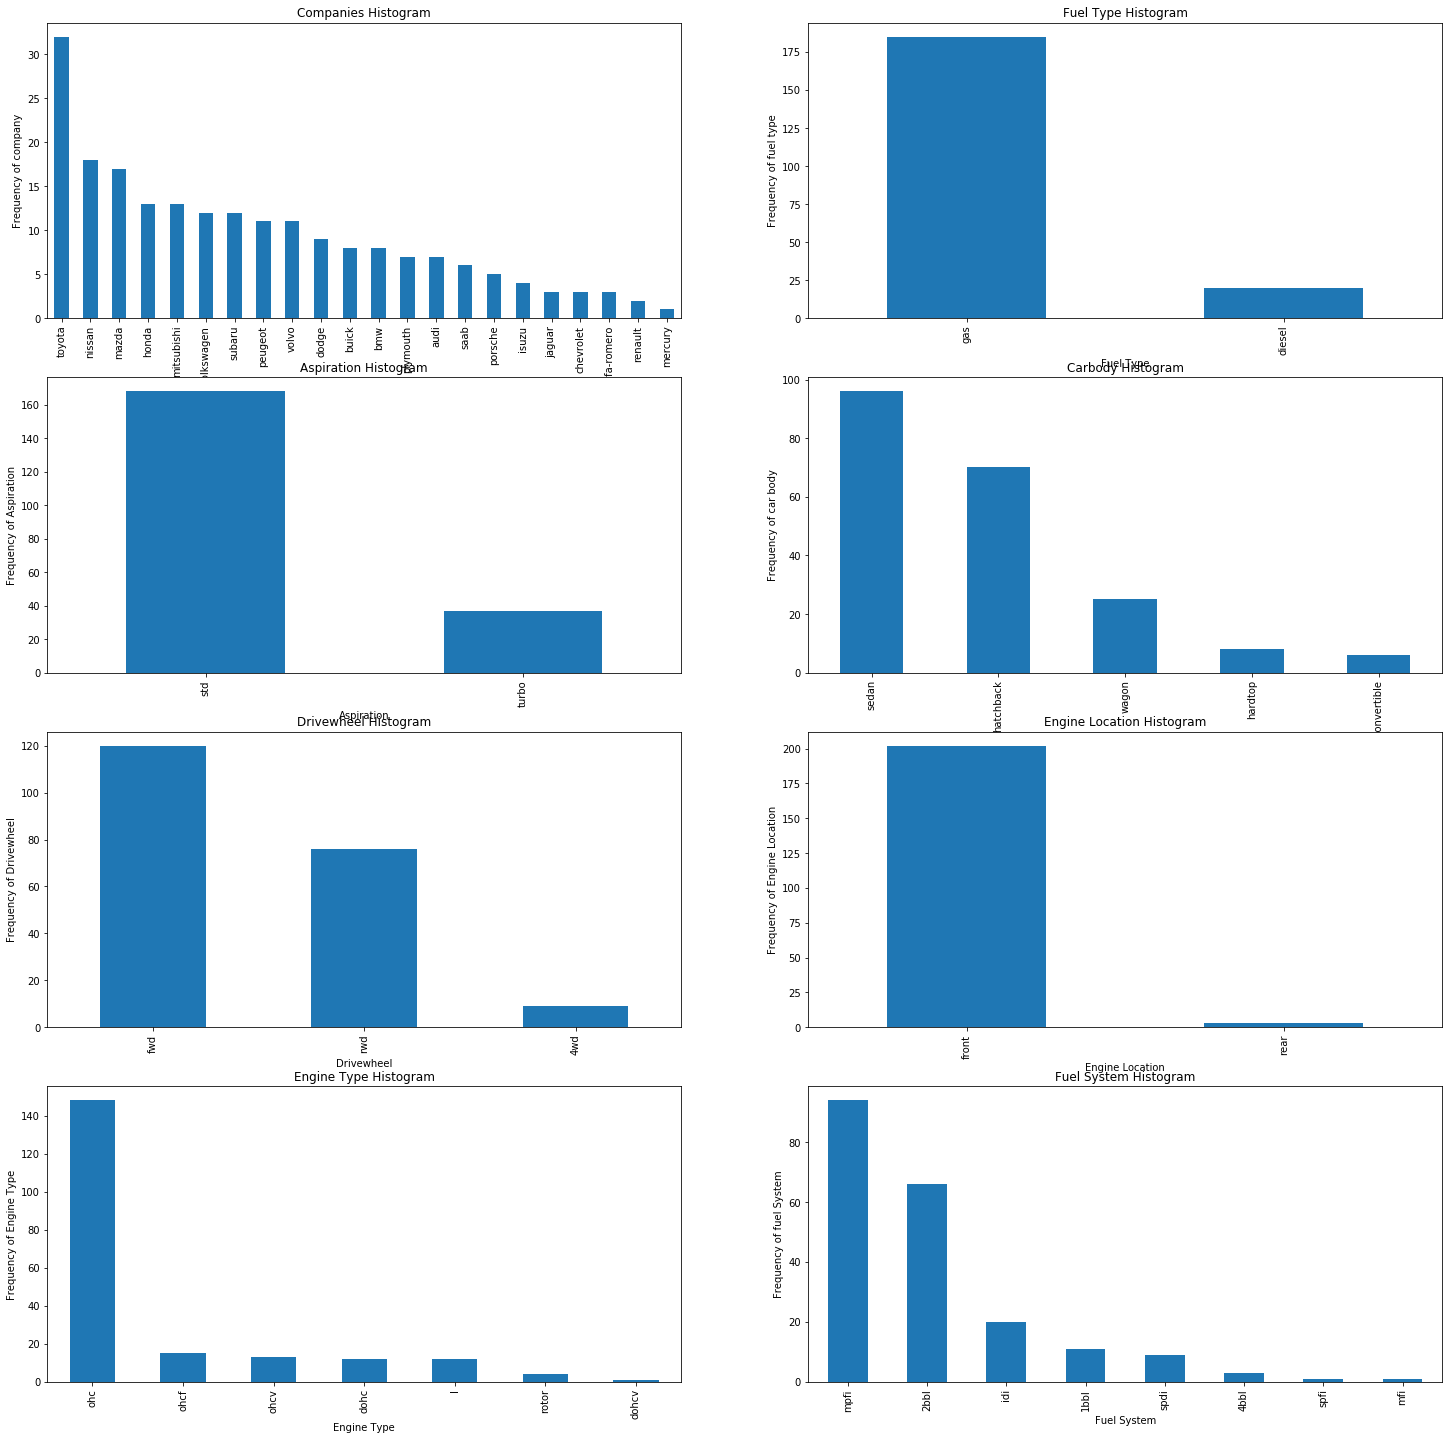

In [29]:
# Graphs
plt.figure(figsize=(25, 25))

plt.subplot(4,2,1)
plt1 = car_data.carcompany.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(4,2,2)
plt1 = car_data.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(4,2,3)
plt1 = car_data.aspiration.value_counts().plot('bar')
plt.title('Aspiration Histogram')
plt1.set(xlabel = 'Aspiration', ylabel='Frequency of Aspiration')

plt.subplot(4,2,4)
plt1 = car_data.carbody.value_counts().plot('bar')
plt.title('Carbody Histogram')
plt1.set(xlabel = 'Car body', ylabel='Frequency of car body')

plt.subplot(4,2,5)
plt1 = car_data.drivewheel.value_counts().plot('bar')
plt.title('Drivewheel Histogram')
plt1.set(xlabel = 'Drivewheel', ylabel='Frequency of Drivewheel')

plt.subplot(4,2,6)
plt1 = car_data.enginelocation.value_counts().plot('bar')
plt.title('Engine Location Histogram')
plt1.set(xlabel = 'Engine Location', ylabel='Frequency of Engine Location')

plt.subplot(4,2,7)
plt1 = car_data.enginetype.value_counts().plot('bar')
plt.title('Engine Type Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine Type')

plt.subplot(4,2,8)
plt1 = car_data.fuelsystem.value_counts().plot('bar')
plt.title('Fuel System Histogram')
plt1.set(xlabel = 'Fuel System', ylabel='Frequency of fuel System')

In [30]:
# Carcompany vs price
g=car_data.groupby(["carcompany"])
g.price.mean().sort_values(ascending=False)
# The car company Jaguar and buick are selling most expensive cars.

carcompany
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

#### Ordered Univariate Analysis

In [31]:
# symboling vs price
car_data.groupby(["symboling"]).agg({"price":"count"}).sort_values(by="price",ascending=False)

,price
symboling,
0,67
1,54
2,32
3,27
-1,22
-2,3


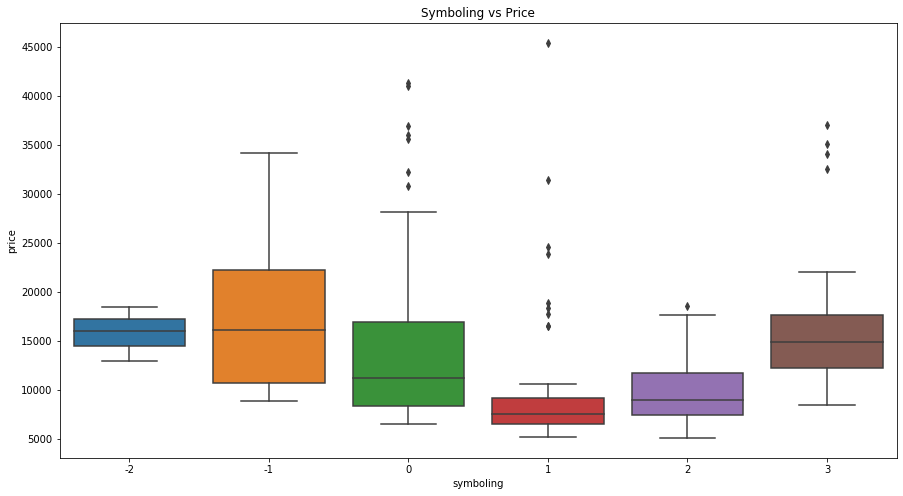

In [32]:
plt.figure(figsize=(15,8))
plt.title('Symboling vs Price')
sns.boxplot(x=car_data["symboling"], y=car_data["price"])
# The cars with symboling rating as -1 has the highest prices since the box spread/width is the maximum.
# Also the cars with rating as 0 are sold the highest.

In [33]:
# doornumber vs price
car_data.groupby(["doornumber"]).agg({"price":"count"}).sort_values(by="price",ascending=False)

,price
doornumber,
four,115
two,90


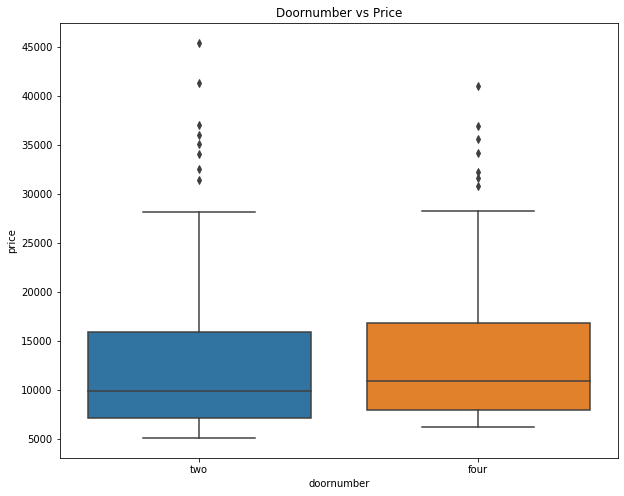

In [34]:
plt.figure(figsize=(10,8))
plt.title('Doornumber vs Price')
sns.boxplot(x=car_data["doornumber"], y=car_data["price"])
# The cars with doors as four are sold more and also have higher price.

In [35]:
# cylindernumber vs price
car_data.groupby(["cylindernumber"]).agg({"price":"count"}).sort_values(by="price",ascending=False)

,price
cylindernumber,
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


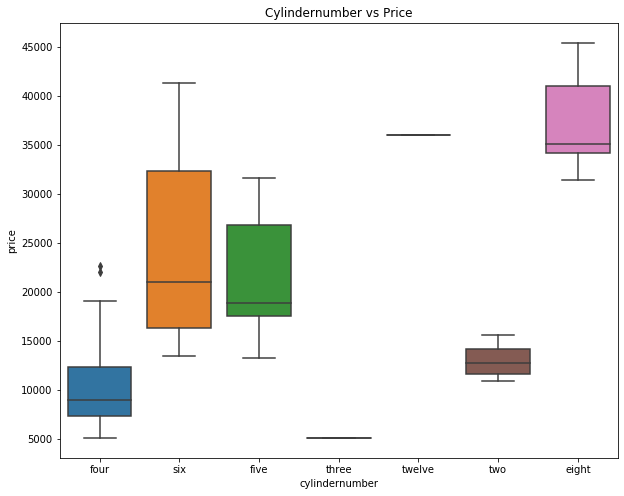

In [36]:
plt.figure(figsize=(10,8))
plt.title('Cylindernumber vs Price')
sns.boxplot(x=car_data["cylindernumber"], y=car_data["price"])
# The cars with cylinders as 4 are the highest selling cars but the cars sold with high prices consist of 8 and 6 cylinders

#### Numerical variables
Checking the relationship with price - should linear regression be used for modelling?

<Figure size 576x432 with 0 Axes>

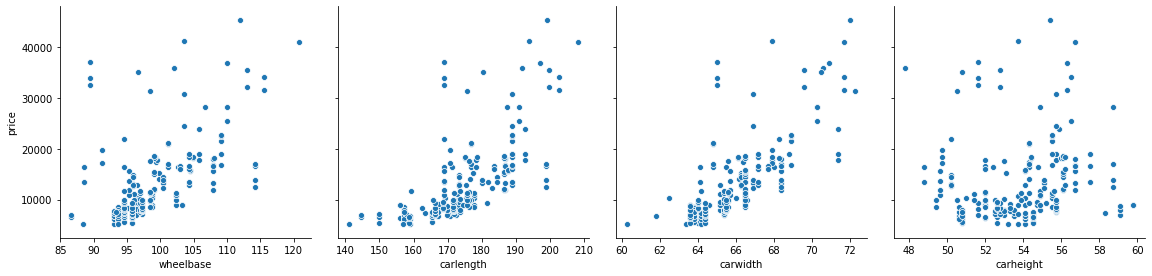

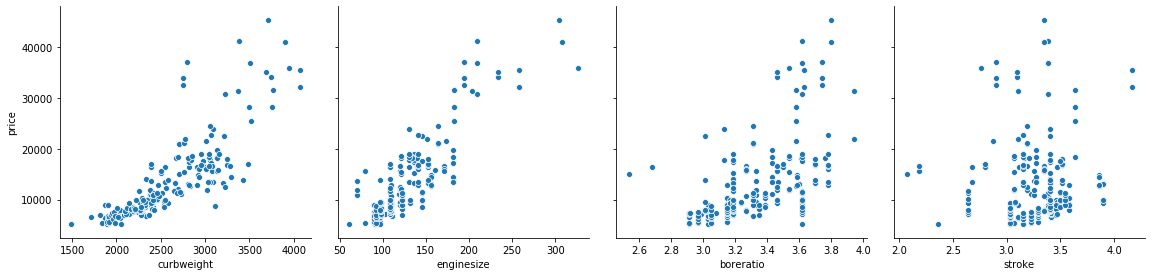

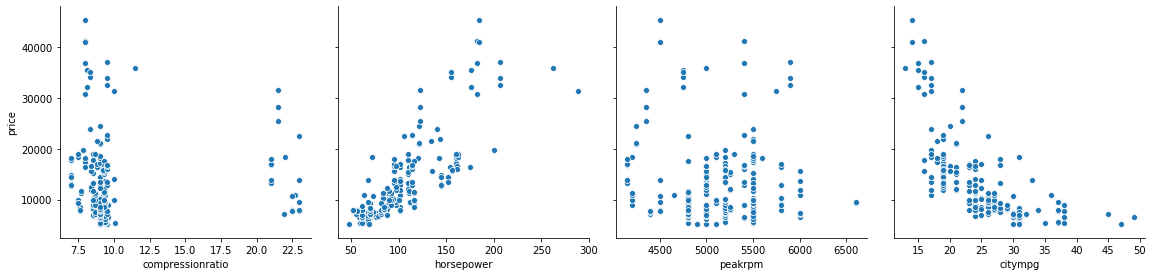

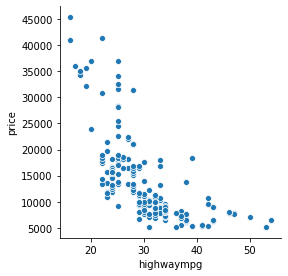

In [37]:
plt.figure(figsize=(8,6))

sns.pairplot(car_data,x_vars=["wheelbase","carlength","carwidth","carheight"],y_vars="price",height=4,aspect=1,kind="scatter")

sns.pairplot(car_data,x_vars=["curbweight","enginesize","boreratio","stroke"],y_vars="price",height=4,aspect=1,kind="scatter")

sns.pairplot(car_data,x_vars=["compressionratio","horsepower","peakrpm","citympg"],y_vars="price",height=4,aspect=1,kind="scatter")

sns.pairplot(car_data,x_vars=["highwaympg"],y_vars="price",height=4,aspect=1,kind="scatter")

# Most of the variables below have a positive linear relationship with price
# compressionratio, citympg and highwaympg have negative linear relationship with price
# carheight does not show any significant trend with price

From the above plots it is clear that linear regression modelling makes sense here.

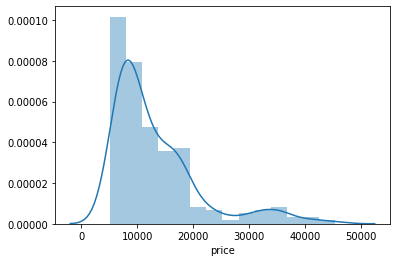

In [38]:
# Analysing price variable.
sns.distplot(car_data["price"])

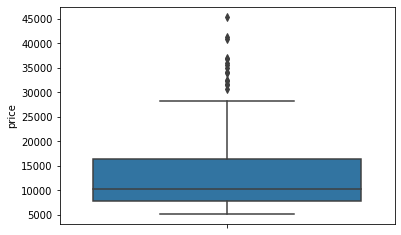

In [39]:
sns.boxplot(y=car_data["price"])

### 4) Bivariate Analysis

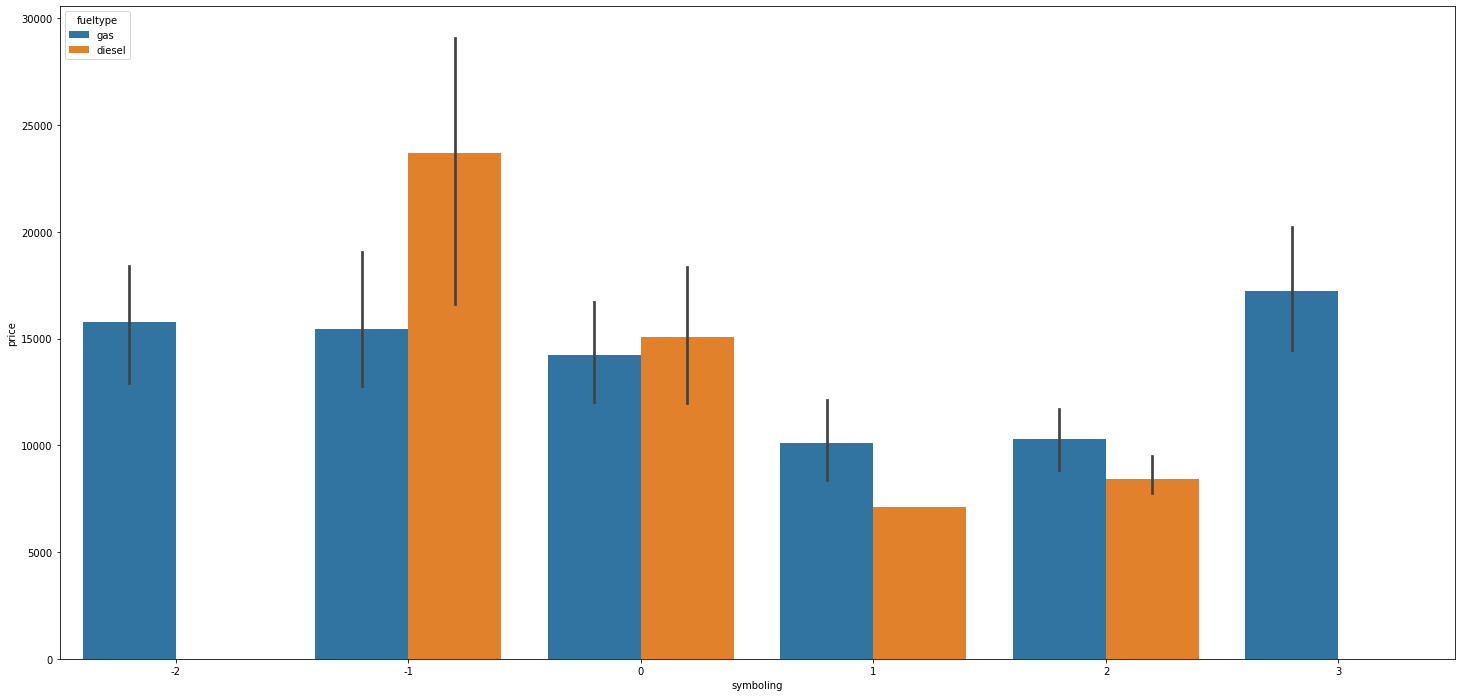

In [40]:
# price vs symboling vs fueltype
plt.figure(figsize=(25,12))
sns.barplot(y='price', x='symboling', hue="fueltype", data=car_data)
# Although cars with fueltype as gas are sold more but expensive cars are diesel cars with symboling rating as -1 

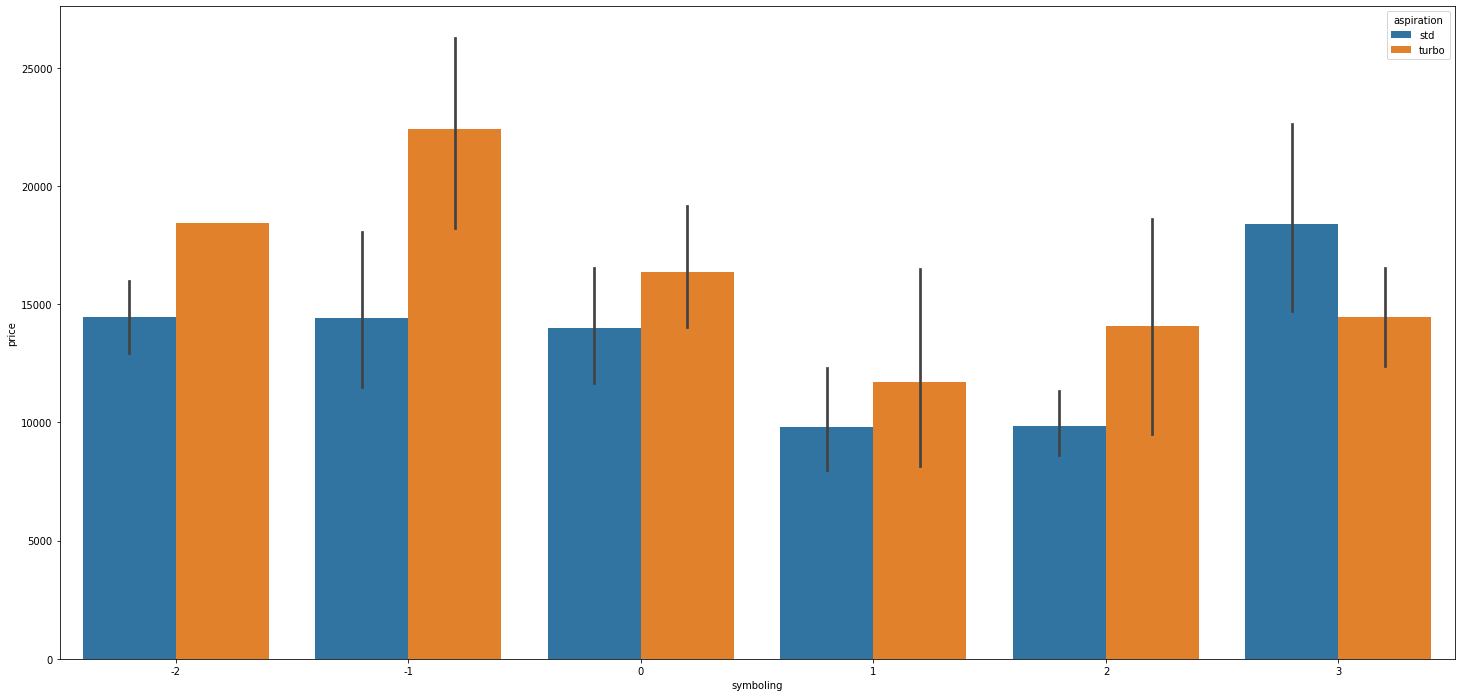

In [41]:
# price vs symboling vs aspiration
plt.figure(figsize=(25,12))
sns.barplot(y='price', x='symboling', hue="aspiration", data=car_data)
# Although cars with aspiration as std are sold more but expensive cars have aspiration as "turbo" with symbolaing rating as -1 

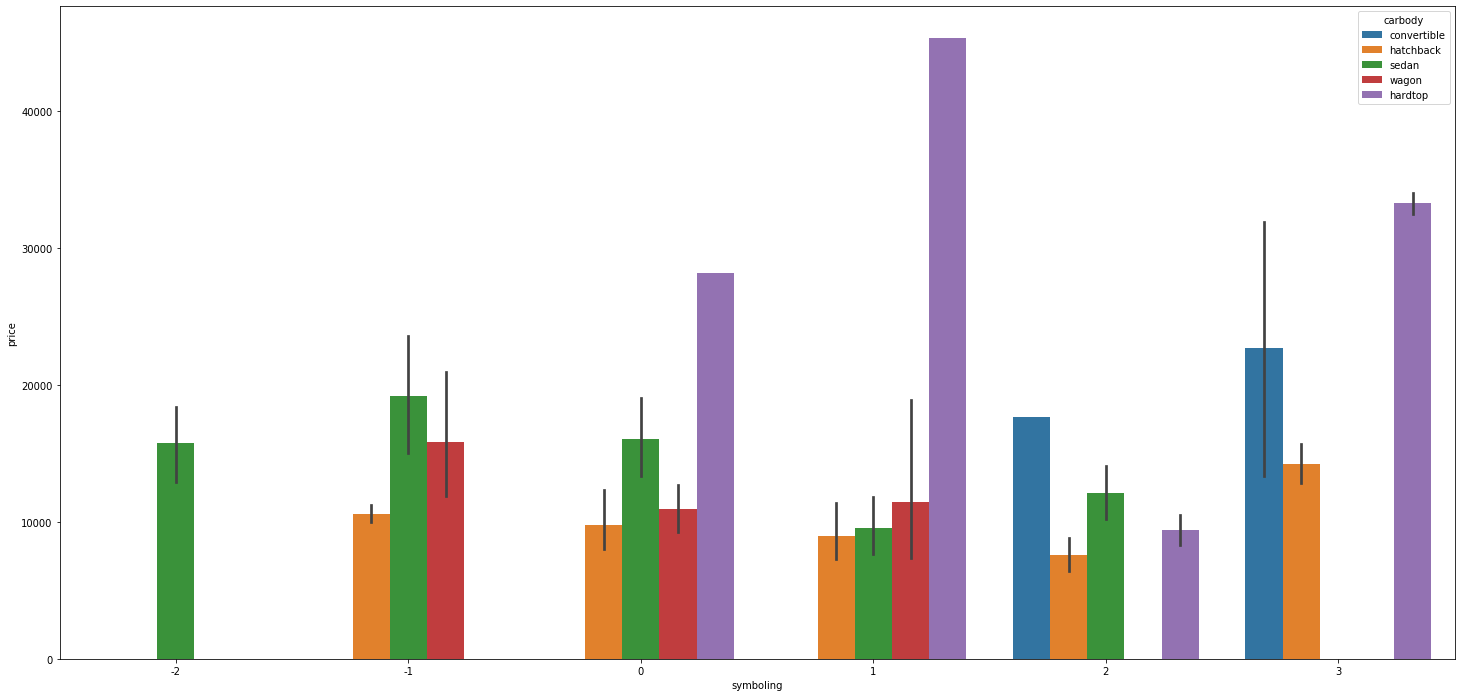

In [42]:
# price vs symboling vs carbody
plt.figure(figsize=(25,12))
sns.barplot(y='price', x='symboling', hue="carbody", data=car_data)
# Although cars with carbody as "sedan" are sold more but expensive cars have carbody as "hardtop" with symbolaing rating as 1 
# The cars with symboling rating as -1 have sedan as carbody.

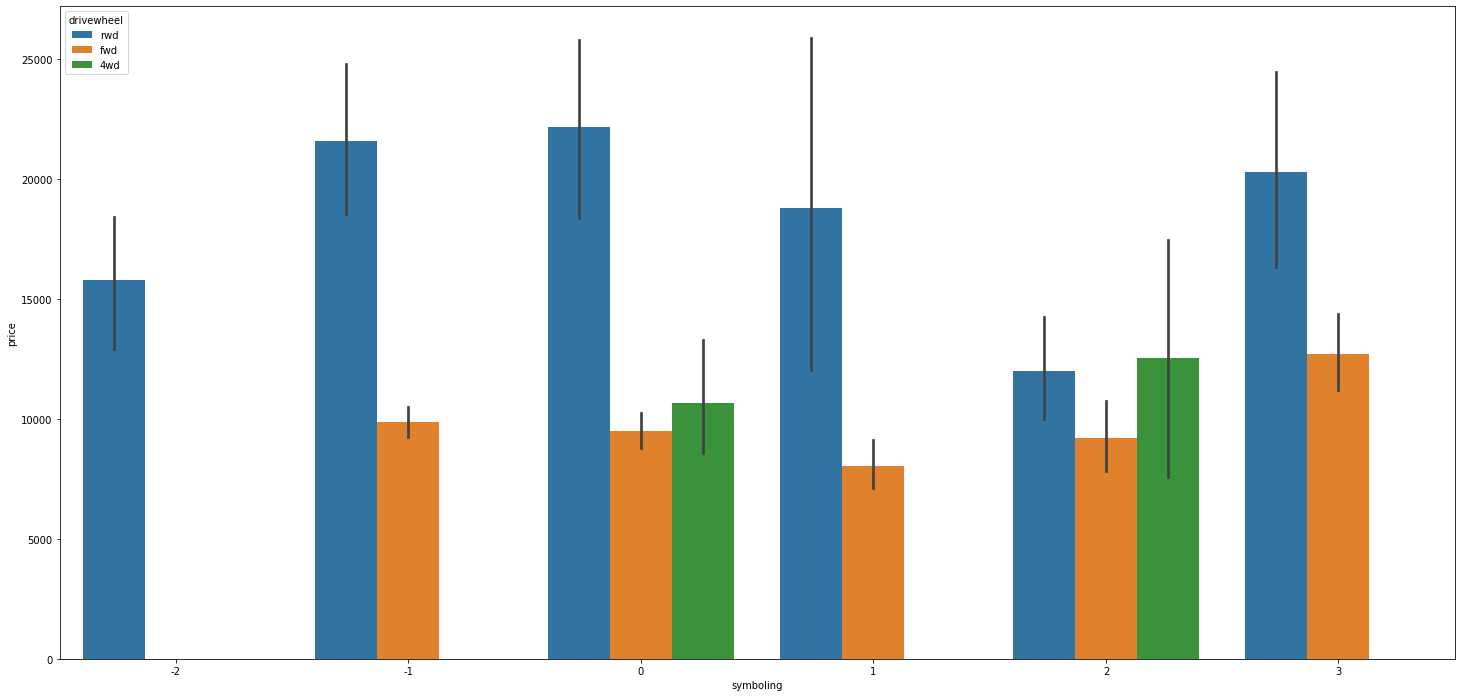

In [43]:
# price vs symboling vs drivewheel
plt.figure(figsize=(25,12))
sns.barplot(y='price', x='symboling', hue="drivewheel", data=car_data)
# Although cars with drivewheel as "fwd" are sold more but expensive cars have drivewheel as "rwd" with symbolaing rating as 0 and -1

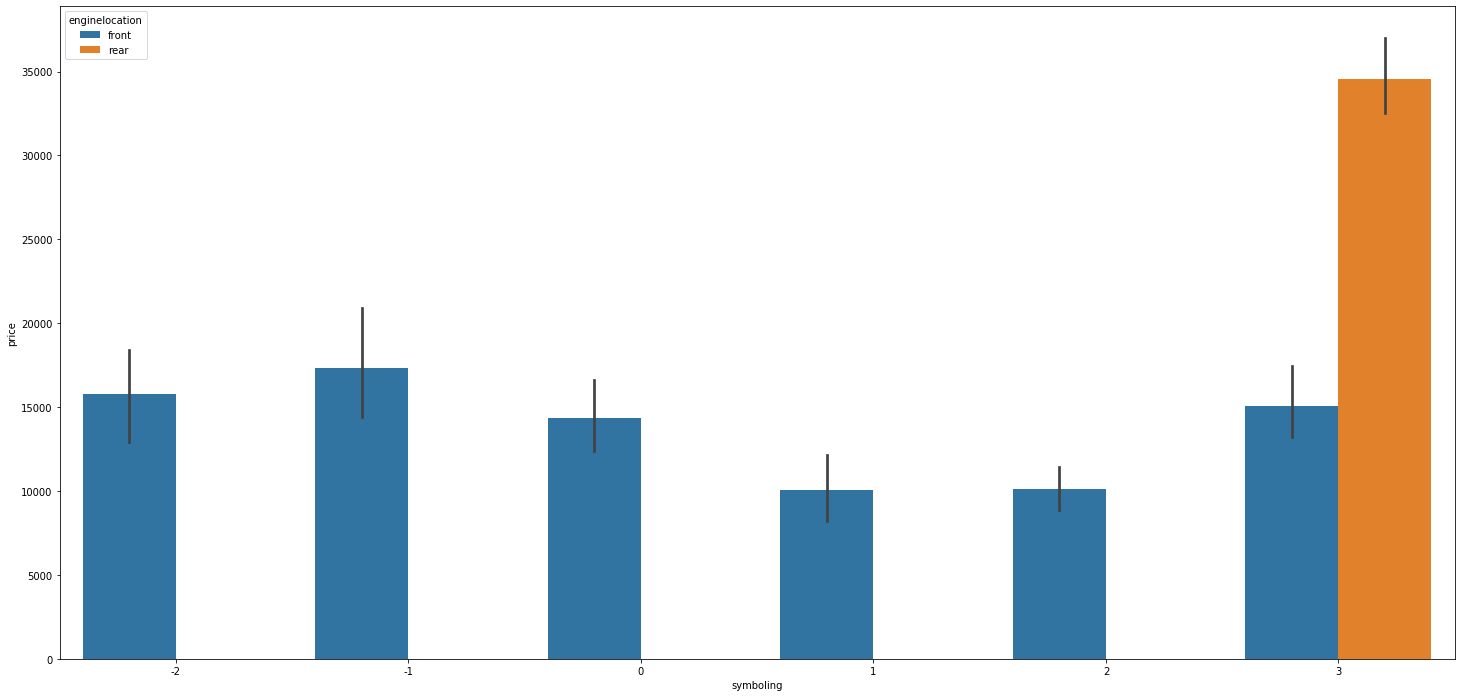

In [44]:
# price vs symboling vs enginelocation
plt.figure(figsize=(25,12))
sns.barplot(y='price', x='symboling', hue="enginelocation", data=car_data)
# Although cars with enginelocation as "front" is preferred and are sold more but expensive cars have enginelocation as "rear" with symbolaing rating as 3 (insurance risky rating very high)

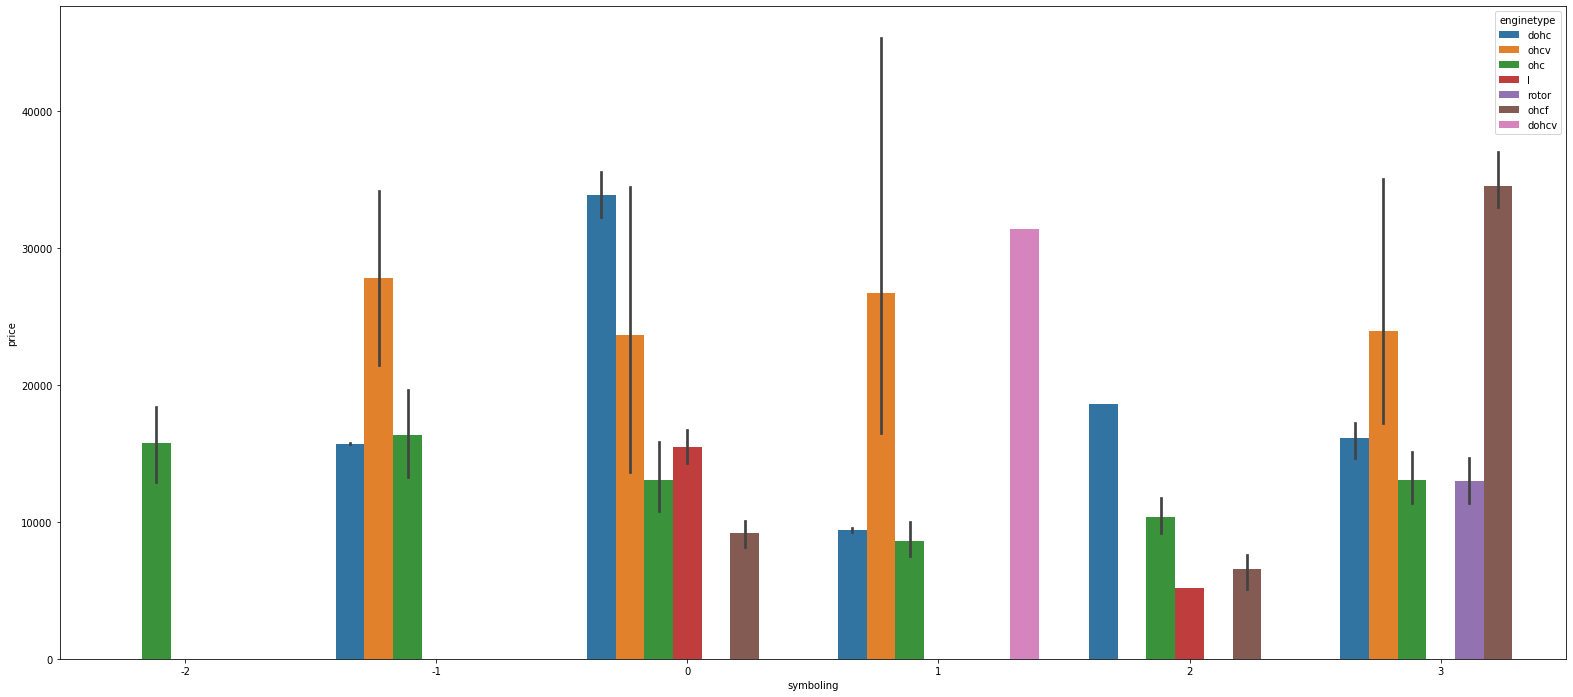

In [45]:
# price vs symboling vs enginetype
plt.figure(figsize=(27,12))
sns.barplot(y='price', x='symboling', hue="enginetype", data=car_data)

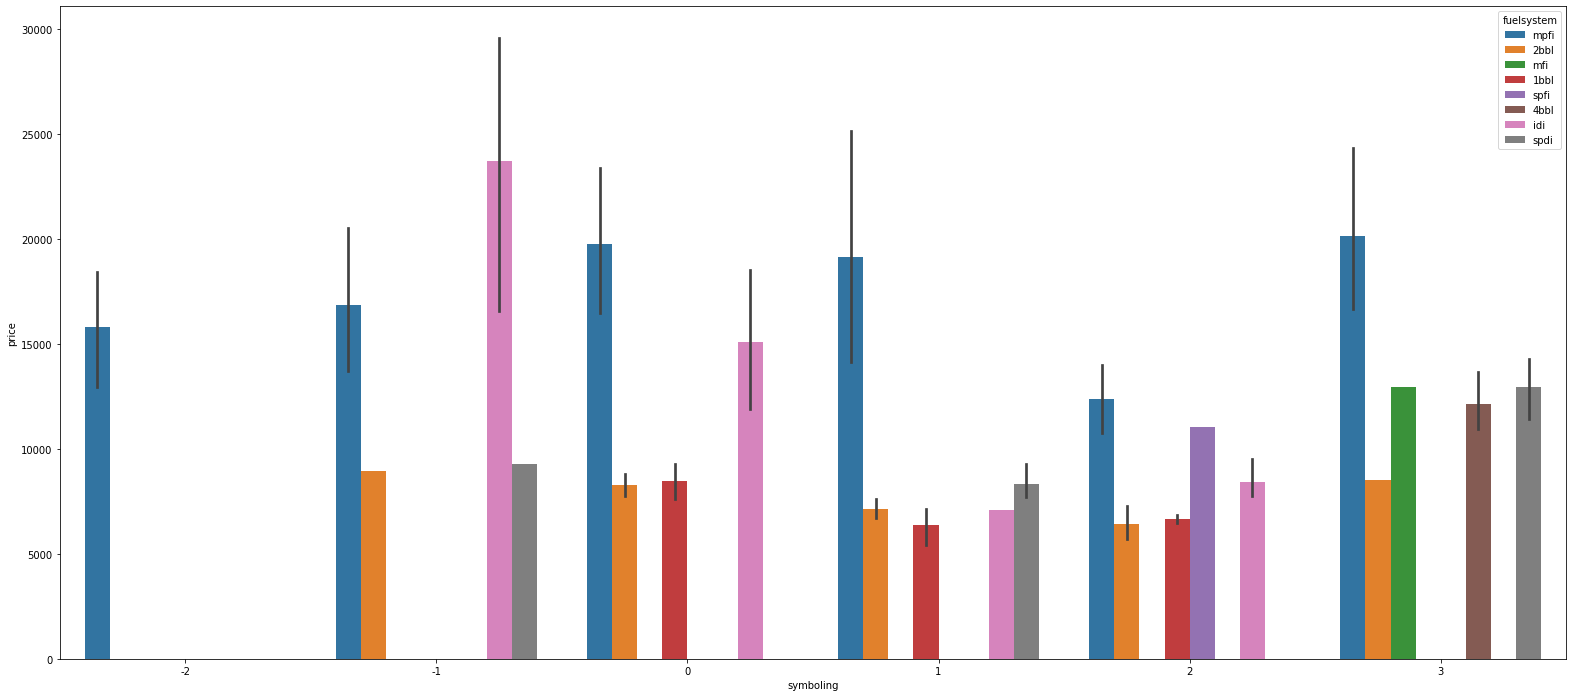

In [46]:
# price vs symboling vs fuelsystem
plt.figure(figsize=(27,12))
sns.barplot(y='price', x='symboling', hue="fuelsystem", data=car_data)

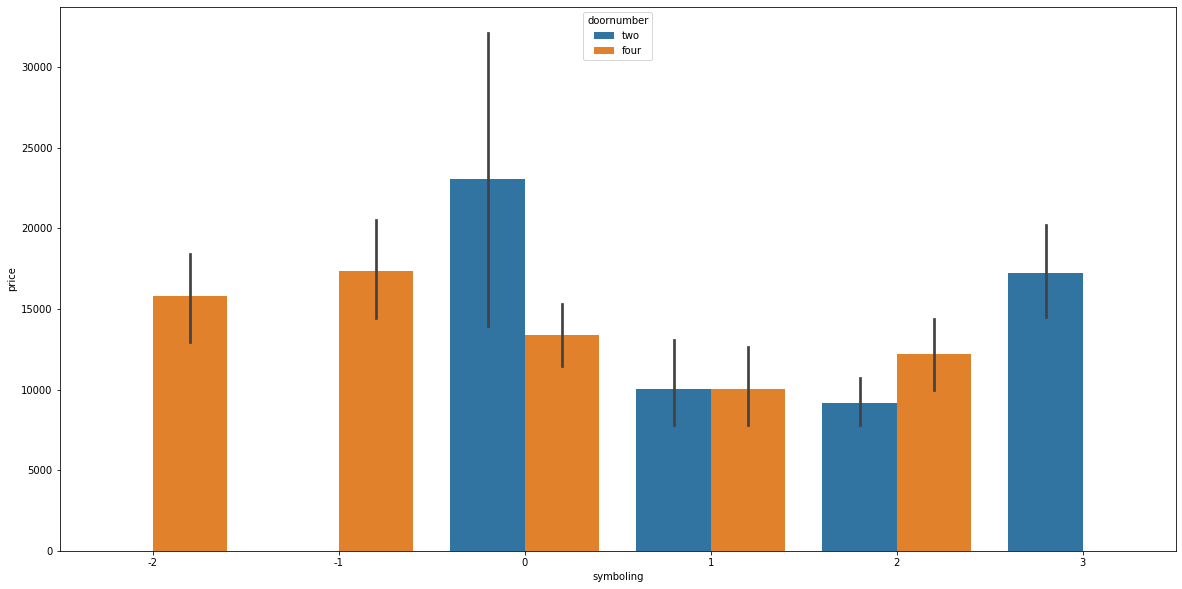

In [47]:
# price vs symboling vs doornumber
plt.figure(figsize=(20,10))
sns.barplot(y='price', x='symboling', hue="doornumber", data=car_data)
# Although cars with doornumber as "four" is preferred and are sold more but expensive cars have two doors.

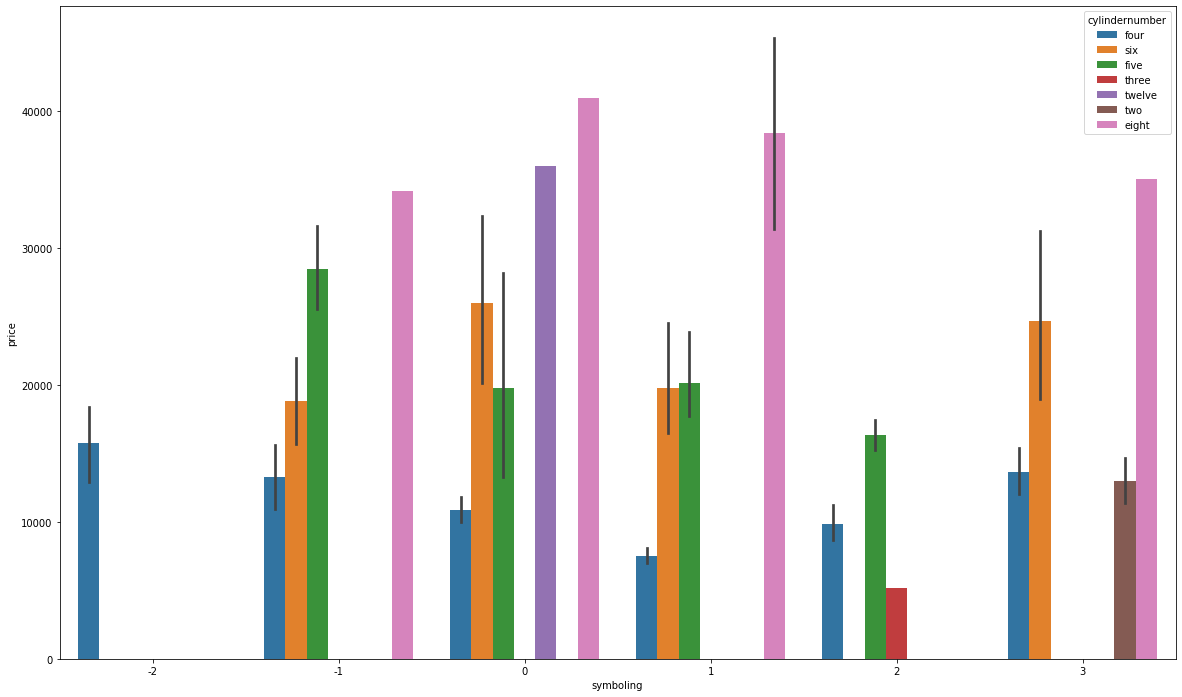

In [48]:
# price vs symboling vs cylindernumber
plt.figure(figsize=(20,12))
sns.barplot(y='price', x='symboling', hue="cylindernumber", data=car_data)
# Although cars with 4 cylinders is preferred and are sold more but expensive cars have 8 cylinders.

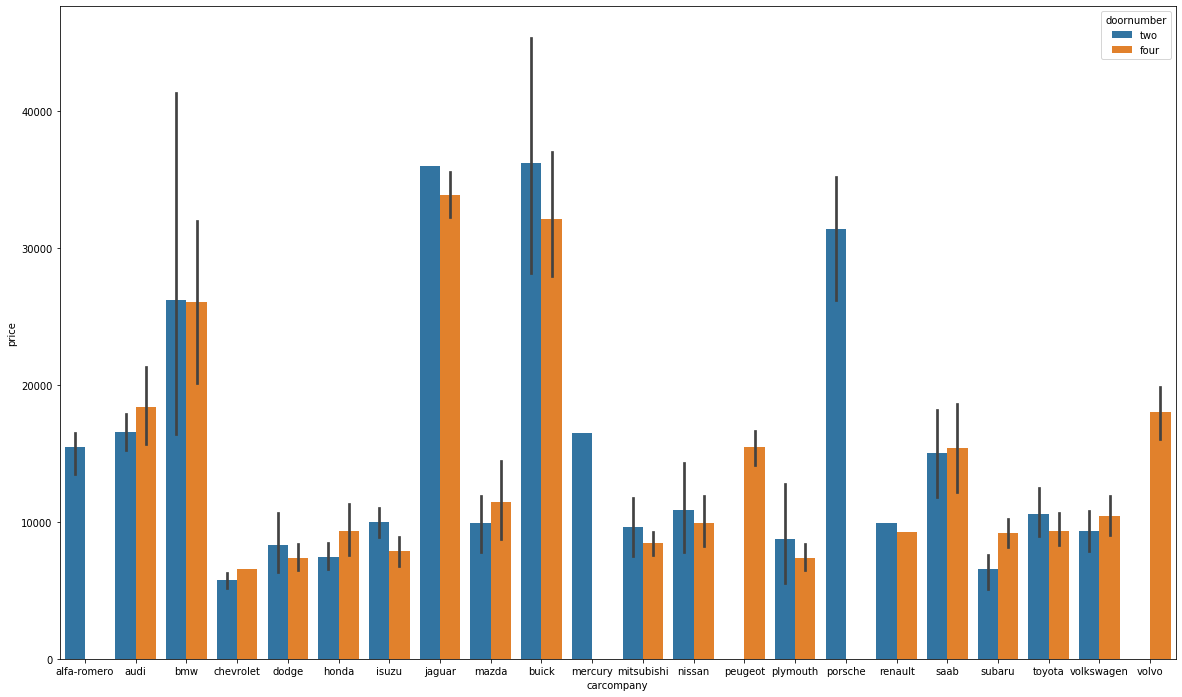

In [49]:
# price vs carcompany vs doornumber
plt.figure(figsize=(20,12))
sns.barplot(y='price', x='carcompany', hue="doornumber", data=car_data)
# Although toyota is the highest selling car company but buick and jaguar are selling expensive cars with 2 doors.

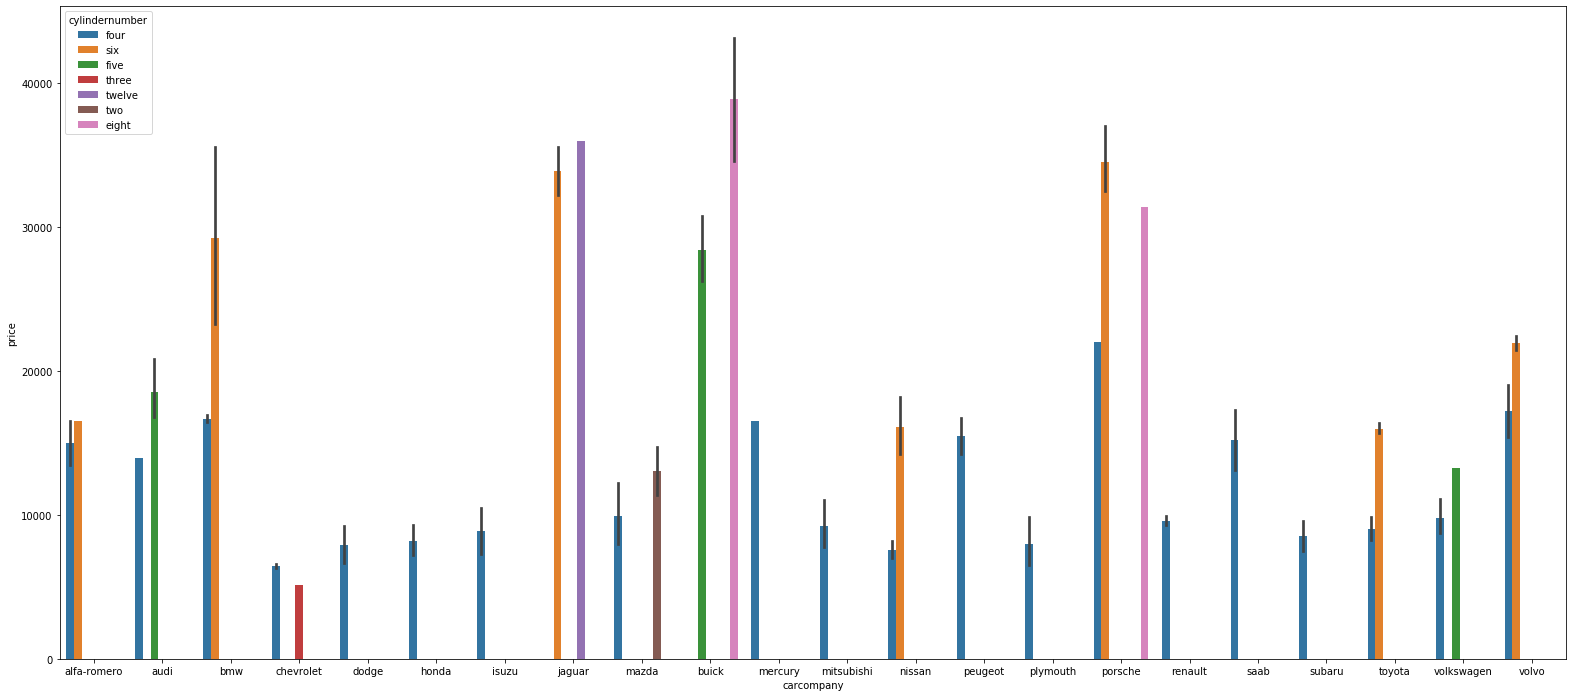

In [50]:
# price vs carcompany vs cylindernumber
plt.figure(figsize=(27,12))
sns.barplot(y='price', x='carcompany', hue="cylindernumber", data=car_data)
# Buick and Jaguar are selling expensive cars with 8 and 12 cylinders respectively.

In [51]:
# Checking the correlation between variables.
cor=round(car_data.corr(),2)
cor

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.00,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
wheelbase,-0.53,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,-0.36,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,-0.23,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,-0.54,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,-0.23,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,-0.11,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.01,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08
compressionratio,-0.18,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1.00,-0.20,-0.44,0.32,0.27,0.07


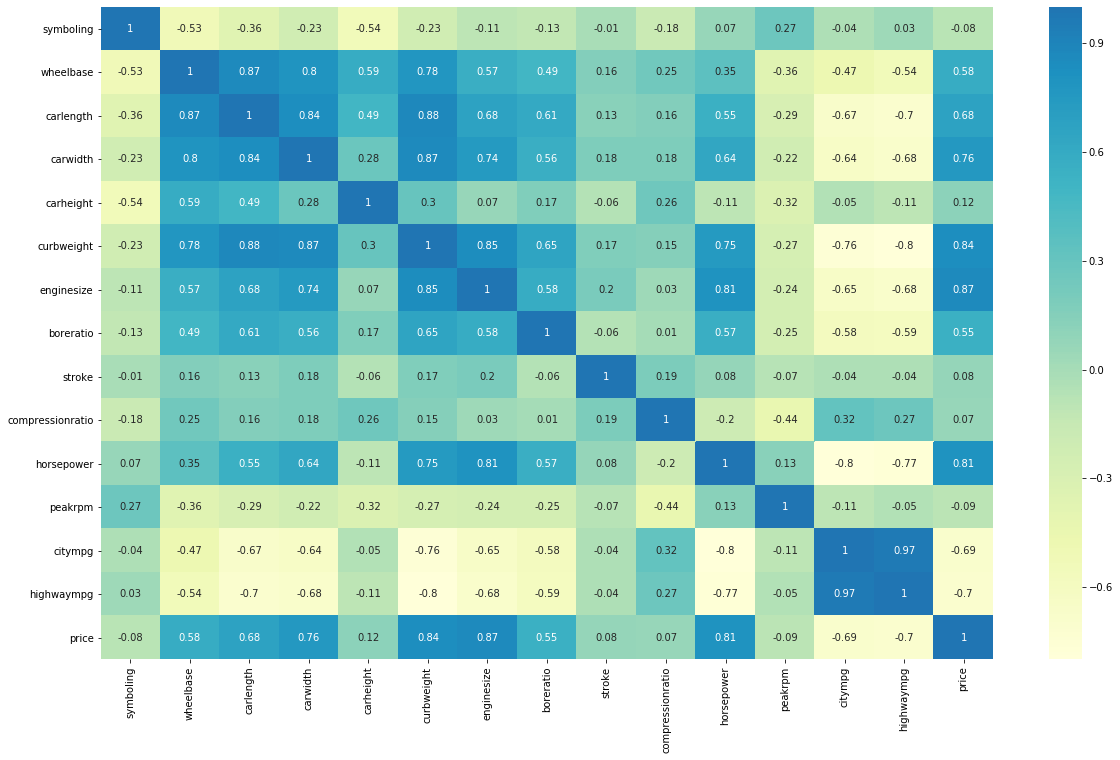

In [52]:
# Heatmap for the correlation of variables.
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,center=0.5,cmap="YlGnBu")

### 5) Creating Dummy variables
This is done to change the categorical variables to number type.

In [53]:
car_data['cylindernumber'] = car_data['cylindernumber'].map({'four': 4, "six": 6,'five': 5, "three": 3,'twelve': 12, "two": 2, "eight": 8})
car_data['cylindernumber'].head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

In [54]:
# Creating dummies to convert categorical variables to numeric
company = pd.get_dummies(car_data['carcompany'], drop_first = True)
car_data = pd.concat([car_data, company], axis = 1)
car_data.drop(['carcompany'], axis = 1, inplace = True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
fuel = pd.get_dummies(car_data['fueltype'], drop_first = True)
car_data = pd.concat([car_data, fuel], axis = 1)
car_data.drop(['fueltype'], axis = 1, inplace = True)
car_data.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas
0,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
asp = pd.get_dummies(car_data['aspiration'], drop_first = True)
car_data = pd.concat([car_data, asp], axis = 1)
car_data.drop(['aspiration'], axis = 1, inplace = True)
car_data.head()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo
0,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
drive = pd.get_dummies(car_data['drivewheel'], drop_first = True)
car_data = pd.concat([car_data, drive], axis = 1)
car_data.drop(['drivewheel'], axis = 1, inplace = True)
car_data.head()

,symboling,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd
0,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,two,hatchback,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2,four,sedan,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,2,four,sedan,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [58]:
door = pd.get_dummies(car_data['doornumber'], drop_first = True)
door.columns = ["doornumber_two"]
car_data = pd.concat([car_data, door], axis = 1)
car_data.drop(['doornumber'], axis = 1, inplace = True)
car_data.head()

,symboling,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two
0,3,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,3,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,1,hatchback,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,2,sedan,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,2,sedan,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [59]:
loc = pd.get_dummies(car_data['enginelocation'], drop_first = True)
car_data = pd.concat([car_data, loc], axis = 1)
car_data.drop(['enginelocation'], axis = 1, inplace = True)
car_data.head()

,symboling,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear
0,3,convertible,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
1,3,convertible,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
2,1,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,2,sedan,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,2,sedan,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [60]:
body = pd.get_dummies(car_data['carbody'], drop_first = True)
car_data = pd.concat([car_data, body], axis = 1)
car_data.drop(['carbody'], axis = 1, inplace = True)
car_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear,hardtop,hatchback,sedan,wagon
0,3,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [61]:
etype = pd.get_dummies(car_data['enginetype'], drop_first = True)
car_data = pd.concat([car_data,etype], axis = 1)
car_data.drop(['enginetype'], axis = 1, inplace = True)
car_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [62]:
fsys = pd.get_dummies(car_data['fuelsystem'], drop_first = True)
car_data = pd.concat([car_data,fsys], axis = 1)
car_data.drop(['fuelsystem'], axis = 1, inplace = True)
car_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [63]:
sym = pd.get_dummies(car_data['symboling'], drop_first = True)
car_data = pd.concat([car_data,sym], axis = 1)
car_data.drop(['symboling'], axis = 1, inplace = True)
car_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [64]:
car_data.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',   'cylindernumber',
             'enginesize',        'boreratio',           'stroke',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',            'price',
                   'audi',              'bmw',            'buick',
              'chevrolet',            'dodge',            'honda',
                  'isuzu',           'jaguar',            'mazda',
                'mercury',       'mitsubishi',           'nissan',
                'peugeot',         'plymouth',          'porsche',
                'renault',             'saab',           'subaru',
                 'toyota',       'volkswagen',            'volvo',
                    'gas',            'turbo',              'fwd',
                    'rwd',   'doornumber_two',             'rear',
                'hardtop',        'hatchback',            'sed

In [65]:
car_data.shape

(205, 64)

### 6) Splitting the Data into Training and Testing Sets

In [66]:
from sklearn.model_selection import train_test_split

# the train and test data set always have the same rows, respectively
np.random.seed(0)
car_train, car_test = train_test_split(car_data, train_size = 0.7, test_size = 0.3, random_state = 100)
car_train.shape

(143, 64)

### 7) Rescaling the Features with Min-Max Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["cylindernumber","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

car_train[num_vars]=scaler.fit_transform(car_train[num_vars])
car_train[num_vars]=car_train[num_vars].apply(lambda x : round(x,3))
car_train.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
122,0.245,0.426,0.292,0.265,0.273,0.2,0.14,0.230,0.525,0.150,0.083,0.551,0.500,0.568,0.069,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
125,0.272,0.452,0.667,0.212,0.500,0.2,0.34,1.000,0.465,0.156,0.396,0.551,0.167,0.270,0.467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
166,0.272,0.449,0.308,0.425,0.315,0.2,0.14,0.444,0.449,0.150,0.267,1.000,0.361,0.324,0.122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0.069,0.450,0.317,0.088,0.411,0.2,0.26,0.627,0.247,0.125,0.262,0.347,0.222,0.270,0.314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
199,0.610,0.776,0.575,0.858,0.647,0.2,0.26,0.746,0.485,0.031,0.475,0.388,0.111,0.135,0.382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [69]:
car_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411112,0.525420,0.461720,0.508972,0.407853,0.240559,0.241280,0.497979,0.535329,0.190734,0.227210,0.400014,0.344259,0.374860,0.219329,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.909091,0.181818,0.594406,0.349650,0.440559,0.006993,0.020979,0.342657,0.475524,0.132867,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.205576,0.204884,0.184479,0.215466,0.211242,0.115818,0.154601,0.207101,0.157880,0.237184,0.165526,0.196438,0.186117,0.188628,0.215685,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.288490,0.387050,0.492733,0.478536,0.498199,0.083624,0.143818,0.476266,0.501156,0.340624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272000,0.399000,0.304000,0.354000,0.245500,0.200000,0.136000,0.305500,0.465000,0.100000,0.092000,0.265000,0.167000,0.216000,0.067500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341000,0.502000,0.425000,0.522000,0.356000,0.200000,0.185000,0.500000,0.545000,0.125000,0.192000,0.429000,0.333000,0.378000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503000,0.670000,0.550000,0.

### 8) Dividing into X and Y sets for the model building

In [70]:
y_train = car_train.pop("price")
X_train = car_train
y_train.head()

122    0.069
125    0.467
166    0.122
1      0.314
199    0.382
Name: price, dtype: float64

In [71]:
car_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
122,0.245,0.426,0.292,0.265,0.273,0.2,0.14,0.230,0.525,0.150,0.083,0.551,0.500,0.568,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
125,0.272,0.452,0.667,0.212,0.500,0.2,0.34,1.000,0.465,0.156,0.396,0.551,0.167,0.270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
166,0.272,0.449,0.308,0.425,0.315,0.2,0.14,0.444,0.449,0.150,0.267,1.000,0.361,0.324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0.069,0.450,0.317,0.088,0.411,0.2,0.26,0.627,0.247,0.125,0.262,0.347,0.222,0.270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
199,0.610,0.776,0.575,0.858,0.647,0.2,0.26,0.746,0.485,0.031,0.475,0.388,0.111,0.135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


### 9) Building the model
Using RFE (Recursive feature elimination) for getting the top 15 features.

In [72]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [73]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [74]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 8),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 20),
 ('audi', False, 23),
 ('bmw', True, 1),
 ('buick', False, 30),
 ('chevrolet', False, 17),
 ('dodge', False, 14),
 ('honda', False, 18),
 ('isuzu', False, 25),
 ('jaguar', False, 19),
 ('mazda', False, 27),
 ('mercury', False, 42),
 ('mitsubishi', False, 11),
 ('nissan', False, 24),
 ('peugeot', True, 1),
 ('plymouth', False, 15),
 ('porsche', True, 1),
 ('renault', False, 21),
 ('saab', True, 1),
 ('subaru', False, 6),
 ('toyota', False, 26),
 ('volkswagen', False, 22),
 ('volvo', False, 31),
 ('gas', True, 1),
 ('turbo', False, 10),
 ('fwd', False, 36),
 ('rwd', False, 40),
 ('doornumber_two', False, 37),
 ('rear', True, 1),
 (

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'bmw', 'peugeot', 'porsche', 'saab', 'gas', 'rear', 'l',
       'rotor', 'idi'],
      dtype='object')

In [76]:
X_train.columns[~rfe.support_]

Index([     'carheight',     'horsepower',     'highwaympg',           'audi',
                'buick',      'chevrolet',          'dodge',          'honda',
                'isuzu',         'jaguar',          'mazda',        'mercury',
           'mitsubishi',         'nissan',       'plymouth',        'renault',
               'subaru',         'toyota',     'volkswagen',          'volvo',
                'turbo',            'fwd',            'rwd', 'doornumber_two',
              'hardtop',      'hatchback',          'sedan',          'wagon',
                'dohcv',            'ohc',           'ohcf',           'ohcv',
                 '2bbl',           '4bbl',            'mfi',           'mpfi',
                 'spdi',           'spfi',               -1,                0,
                      1,                2,                3],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [77]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [78]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [79]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [80]:
#Checking the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.14e-66
Time:                        16:50:18   Log-Likelihood:                 220.00
No. Observations:                 143   AIC:                            -400.0
Df Residuals:                     123   BIC:                            -340.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1490      0.075  

In [81]:
# Dropping citympg since this variabke has very high p-value=0.271 and therefore is insignificant.
X_train_1 = X_train_rfe.drop(["citympg"], axis = 1)

In [82]:
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.67e-67
Time:                        16:50:18   Log-Likelihood:                 219.29
No. Observations:                 143   AIC:                            -400.6
Df Residuals:                     124   BIC:                            -344.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1635      0.074  

In [83]:
# Dropping gas (fueltype) since this variabke has very high p-value=0.174 and therefore is insignificant.
X_train_2 = X_train_1.drop(["gas"], axis = 1)

In [84]:
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_2)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.67e-67
Time:                        16:50:18   Log-Likelihood:                 219.29
No. Observations:                 143   AIC:                            -400.6
Df Residuals:                     124   BIC:                            -344.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1042      0.064  

In [85]:
# Dropping wheelbase since this variabke has very high p-value=0.139 and therefore is insignificant.
X_train_3 = X_train_2.drop(["wheelbase"], axis = 1)

In [86]:
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_3)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.00e-67
Time:                        16:50:19   Log-Likelihood:                 218.03
No. Observations:                 143   AIC:                            -400.1
Df Residuals:                     125   BIC:                            -346.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1018      0.065  

In [87]:
# Creating a function to calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculatevif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [88]:
vif=calculatevif(X_train_3)
vif

,Features,VIF
0,const,187.96
17,idi,71.06
8,compressionratio,62.40
5,enginesize,39.74
4,cylindernumber,20.09
3,curbweight,18.18
11,peugeot,10.22
1,carlength,9.52
15,l,9.27
6,boreratio,7.59


In [89]:
# Dropping compressionratio since this variabke has very high p-value=0.1769 and therefore is insignificant.
X_train_4 = X_train_3.drop(["compressionratio"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_4)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.22e-68
Time:                        16:50:20   Log-Likelihood:                 216.98
No. Observations:                 143   AIC:                            -400.0
Df Residuals:                     126   BIC:                            -349.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0693      0.060      1.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
vif=calculatevif(X_train_4)
vif

,Features,VIF
0,const,162.34
5,enginesize,39.10
4,cylindernumber,19.73
3,curbweight,14.81
10,peugeot,10.07
14,l,9.22
1,carlength,8.27
6,boreratio,7.50
2,carwidth,7.11
7,stroke,3.66


In [91]:
# Removing cont since it has high p-value and high vif
X_train_4.drop(['const'], inplace=True, axis=1)
X_train_4.columns

Index(['carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'bmw', 'peugeot', 'porsche', 'saab',
       'rear', 'l', 'rotor', 'idi'],
      dtype='object')

In [92]:
vif=calculatevif(X_train_4)
vif

,Features,VIF
2,curbweight,67.85
0,carlength,62.94
1,carwidth,50.62
4,enginesize,48.59
3,cylindernumber,25.42
5,boreratio,13.11
6,stroke,12.10
9,peugeot,10.41
7,peakrpm,9.54
13,l,9.50


In [93]:
# Building the model
X_train_lm = sm.add_constant(X_train_4)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.22e-68
Time:                        16:51:30   Log-Likelihood:                 216.98
No. Observations:                 143   AIC:                            -400.0
Df Residuals:                     126   BIC:                            -349.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0693      0.060      1.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
# Removing rotor since this is insignificant
X_train_5 = X_train_4.drop(["rotor"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_5)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     127.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.80e-69
Time:                        16:54:04   Log-Likelihood:                 215.54
No. Observations:                 143   AIC:                            -399.1
Df Residuals:                     127   BIC:                            -351.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0838      0.060      1.

In [95]:
vif=calculatevif(X_train_5)
vif

,Features,VIF
2,curbweight,63.78
0,carlength,60.86
1,carwidth,49.40
4,enginesize,48.31
3,cylindernumber,22.71
5,boreratio,13.08
6,stroke,12.01
9,peugeot,10.35
13,l,9.50
7,peakrpm,8.67


In [96]:
# Removing saab since this is insignificant
X_train_6 = X_train_5.drop(["saab"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_6)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.34e-69
Time:                        16:57:28   Log-Likelihood:                 213.94
No. Observations:                 143   AIC:                            -397.9
Df Residuals:                     128   BIC:                            -353.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0738      0.060      1.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [97]:
vif=calculatevif(X_train_6)
vif

,Features,VIF
2,curbweight,63.77
0,carlength,57.99
1,carwidth,48.77
4,enginesize,48.31
3,cylindernumber,22.61
5,boreratio,13.08
6,stroke,11.74
9,peugeot,10.30
12,l,9.50
7,peakrpm,8.61


In [98]:
# curbweight has very high vif, removing to to see the impact
X_train_7 = X_train_6.drop(["curbweight"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_7)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     123.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.60e-66
Time:                        17:03:52   Log-Likelihood:                 202.46
No. Observations:                 143   AIC:                            -376.9
Df Residuals:                     129   BIC:                            -335.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1388      0.063      2.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [99]:
vif=calculatevif(X_train_7)
vif

,Features,VIF
1,carwidth,46.24
0,carlength,43.94
3,enginesize,25.32
2,cylindernumber,20.00
4,boreratio,12.90
5,stroke,11.13
8,peugeot,10.29
11,l,9.46
6,peakrpm,8.26
9,porsche,2.26


In [100]:
# curbweight is highly correlated with carwidth and carlength therefore removing carlength since it has very high p-value, removing to to see the impact
X_train_8 = X_train_7.drop(["carlength"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     134.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.77e-67
Time:                        17:10:22   Log-Likelihood:                 202.45
No. Observations:                 143   AIC:                            -378.9
Df Residuals:                     130   BIC:                            -340.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1398      0.062      2.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [101]:
vif=calculatevif(X_train_8)
vif

,Features,VIF
0,carwidth,26.66
2,enginesize,25.30
1,cylindernumber,19.98
4,stroke,10.90
3,boreratio,10.26
7,peugeot,10.12
10,l,9.41
5,peakrpm,8.25
11,idi,1.89
8,porsche,1.71


In [102]:
# Removing carwidth as well since it has very high vif
X_train_9 = X_train_8.drop(["carwidth"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_9)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     75.10
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.77e-51
Time:                        17:13:16   Log-Likelihood:                 159.14
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     131   BIC:                            -258.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1387      0.084      1.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [103]:
vif=calculatevif(X_train_9)
vif

,Features,VIF
1,enginesize,22.24
0,cylindernumber,19.66
3,stroke,10.43
6,peugeot,9.56
9,l,9.18
2,boreratio,8.20
4,peakrpm,7.64
10,idi,1.76
7,porsche,1.70
8,rear,1.54


Removing carwidth is not good since it is not impacting vif of the remaining variables much and also the p-value of other variables has increased therefore restoring carwidth and removing enginesize instead.

In [104]:
# Removing enginesize
X_train_10 = X_train_8.drop(["enginesize"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_10)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     77.41
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.77e-52
Time:                        17:38:50   Log-Likelihood:                 161.01
No. Observations:                 143   AIC:                            -298.0
Df Residuals:                     131   BIC:                            -262.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3910      0.045     -8.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [105]:
vif=calculatevif(X_train_10)
vif

,Features,VIF
0,carwidth,23.44
3,stroke,10.69
6,peugeot,10.12
2,boreratio,9.64
9,l,9.40
1,cylindernumber,8.93
4,peakrpm,5.72
10,idi,1.83
7,porsche,1.71
8,rear,1.60


In [106]:
# Removing porsche with high p-value
X_train_11 = X_train_10.drop(["porsche"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_11)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     85.60
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.05e-52
Time:                        17:45:57   Log-Likelihood:                 160.87
No. Observations:                 143   AIC:                            -299.7
Df Residuals:                     132   BIC:                            -267.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3850      0.043     -8.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [107]:
vif=calculatevif(X_train_11)
vif

,Features,VIF
0,carwidth,23.21
6,peugeot,10.08
3,stroke,10.03
2,boreratio,9.49
8,l,9.39
1,cylindernumber,8.93
4,peakrpm,5.67
9,idi,1.83
5,bmw,1.14
7,rear,1.13


In [108]:
# Removing stroke with high p-value
X_train_12 = X_train_11.drop(["stroke"], axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_12)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     94.30
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.60e-53
Time:                        17:48:15   Log-Likelihood:                 159.87
No. Observations:                 143   AIC:                            -299.7
Df Residuals:                     133   BIC:                            -270.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3471      0.033    -10.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
vif=calculatevif(X_train_12)
vif

,Features,VIF
0,carwidth,21.62
5,peugeot,9.93
2,boreratio,9.46
7,l,9.32
1,cylindernumber,8.84
3,peakrpm,3.82
8,idi,1.59
4,bmw,1.14
6,rear,1.11


Removing enginesize is not improving vif of carwidth and therefore restoring enginesize and removing carwdth.

In [113]:
X_train_8.columns

Index(['carwidth', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'bmw', 'peugeot', 'porsche', 'rear', 'l', 'idi'],
      dtype='object')

In [114]:
# Removing carwidth with high vif
X_train_8.drop(["carwidth"], inplace=True, axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     75.10
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.77e-51
Time:                        18:02:02   Log-Likelihood:                 159.14
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     131   BIC:                            -258.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1387      0.084      1.

In [115]:
vif=calculatevif(X_train_8)
vif

,Features,VIF
1,enginesize,22.24
0,cylindernumber,19.66
3,stroke,10.43
6,peugeot,9.56
9,l,9.18
2,boreratio,8.20
4,peakrpm,7.64
10,idi,1.76
7,porsche,1.70
8,rear,1.54


In [116]:
# Removing rear with high p-value
X_train_8.drop(["rear"], inplace=True, axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     83.22
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.17e-52
Time:                        18:03:22   Log-Likelihood:                 159.12
No. Observations:                 143   AIC:                            -296.2
Df Residuals:                     132   BIC:                            -263.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1345      0.081      1.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [117]:
vif=calculatevif(X_train_8)
vif

,Features,VIF
1,enginesize,21.85
0,cylindernumber,19.48
3,stroke,10.37
6,peugeot,9.56
8,l,9.18
2,boreratio,8.11
4,peakrpm,7.51
9,idi,1.76
7,porsche,1.22
5,bmw,1.14


In [118]:
# Removing l with high p-value
X_train_8.drop(["l"], inplace=True, axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     92.86
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.27e-53
Time:                        18:04:31   Log-Likelihood:                 158.92
No. Observations:                 143   AIC:                            -297.8
Df Residuals:                     133   BIC:                            -268.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1435      0.079      1.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [119]:
vif=calculatevif(X_train_8)
vif

,Features,VIF
1,enginesize,21.63
0,cylindernumber,19.39
3,stroke,10.33
2,boreratio,8.11
4,peakrpm,7.51
8,idi,1.76
6,peugeot,1.33
7,porsche,1.22
5,bmw,1.14


In [120]:
# Removing peugeot with high p-value
X_train_8.drop(["peugeot"], inplace=True, axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.10e-54
Time:                        18:05:46   Log-Likelihood:                 158.58
No. Observations:                 143   AIC:                            -299.2
Df Residuals:                     134   BIC:                            -272.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1379      0.079      1.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [121]:
vif=calculatevif(X_train_8)
vif

,Features,VIF
1,enginesize,21.58
0,cylindernumber,19.17
3,stroke,10.26
2,boreratio,7.60
4,peakrpm,7.51
7,idi,1.63
6,porsche,1.21
5,bmw,1.14


In [122]:
# Removing cylindernumber with high vif
X_train_8.drop(["cylindernumber"], inplace=True, axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     102.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.97e-51
Time:                        18:07:30   Log-Likelihood:                 148.78
No. Observations:                 143   AIC:                            -281.6
Df Residuals:                     135   BIC:                            -257.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1622      0.043     -3.786      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [123]:
# Removing stroke with high p-value
X_train_8.drop(["stroke"], inplace=True, axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     118.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.42e-51
Time:                        18:09:06   Log-Likelihood:                 147.88
No. Observations:                 143   AIC:                            -281.8
Df Residuals:                     136   BIC:                            -261.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1974      0.033     -5.911      0.0

In [124]:
vif=calculatevif(X_train_8)
vif

,Features,VIF
1,boreratio,6.98
0,enginesize,5.10
2,peakrpm,2.92
5,idi,1.31
3,bmw,1.13
4,porsche,1.09


In [125]:
# Removing boreratio with high p-value and high vif
X_train_8.drop(["boreratio"], inplace=True, axis = 1)
# Rebuilding the model
X_train_lm = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.98e-52
Time:                        18:10:19   Log-Likelihood:                 145.97
No. Observations:                 143   AIC:                            -279.9
Df Residuals:                     137   BIC:                            -262.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1584      0.027     -5.919      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [126]:
vif=calculatevif(X_train_8)
vif

,Features,VIF
0,enginesize,2.58
1,peakrpm,2.08
4,idi,1.22
2,bmw,1.13
3,porsche,1.07


### The significant variables impacting price are enginesize, peakrpm, idi, bmw and porsche with R2 value as 83.5% and high F-stats value which tells that the overall model fit is good with low VIF within 2.58

### 10) Residual Analysis of the train data
Checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), plotting the histogram of the error terms.

In [131]:
y_train_price = lm.predict(X_train_lm)
y_train_price.shape

(143,)

Text(0, 0.5, 'Price')

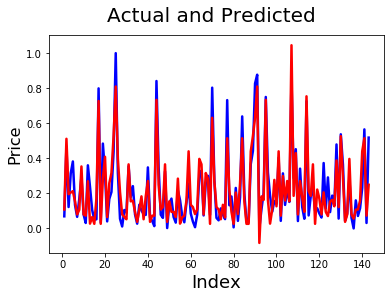

In [132]:
#Actual vs Predicted
c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_price, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Price', fontsize=16)                              

Text(0.5, 0, 'Errors')

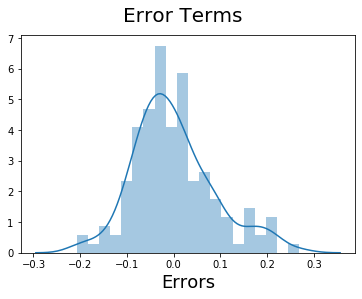

In [128]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        

Text(0, 0.5, 'Errors')

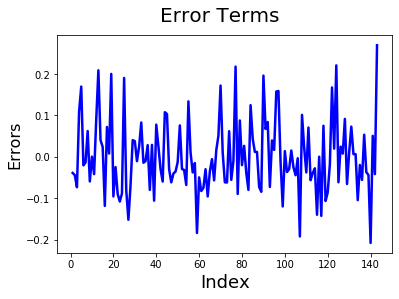

In [134]:
# Error terms
c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,(y_train - y_train_price), color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Errors', fontsize=16)                # Y-label

### 11) Making predictions on the training data

In [135]:
# Applying the scaling on the test sets
car_test[num_vars]=scaler.transform(car_test[num_vars])
car_test[num_vars]=car_test[num_vars].apply(lambda x : round(x,3))
car_test.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,fwd,rwd,doornumber_two,rear,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
160,0.314,0.410,0.342,0.460,0.235,0.2,0.140,0.405,0.424,0.125,0.092,0.265,0.694,0.811,0.072,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
186,0.369,0.498,0.433,0.699,0.305,0.2,0.181,0.405,0.611,0.125,0.154,0.449,0.389,0.459,0.093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
59,0.421,0.597,0.517,0.522,0.348,0.2,0.230,0.563,0.606,0.100,0.150,0.265,0.361,0.405,0.103,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
165,0.272,0.449,0.308,0.425,0.301,0.2,0.140,0.444,0.449,0.150,0.267,1.000,0.361,0.324,0.115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
140,0.231,0.263,0.292,0.699,0.292,0.2,0.177,0.746,0.227,0.106,0.104,0.102,0.361,0.378,0.069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [136]:
y_test = car_test.pop('price')
X_test = car_test
y_test.head()

160    0.072
186    0.093
59     0.103
165    0.115
140    0.069
Name: price, dtype: float64

In [137]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_data = X_test[X_train_8.columns]

# Adding a constant variable 
X_test_data = sm.add_constant(X_test_data)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [138]:
# Making predictions
y_pred = lm.predict(X_test_data)

In [140]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [141]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.008236406812536384
r_square_value : 0.8459053510069823


#### The R2 value of the model on the test data (84.5%) is approximately equal to the R2 value of the model on the training set data (83.5%)

### 12) Model Evaluation

Text(0, 0.5, 'y_pred')

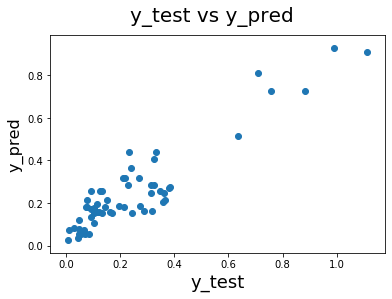

In [143]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)    

Text(0, 0.5, 'Price')

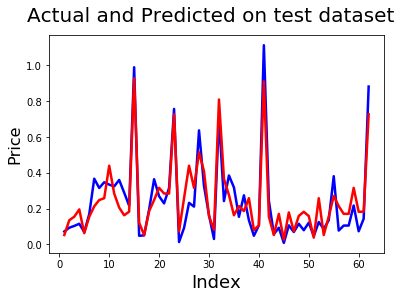

In [144]:
# Actual vs Predicted for the test set
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted on test dataset', fontsize=20)             
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Price', fontsize=16)                              

Text(0.5, 0, 'Errors')

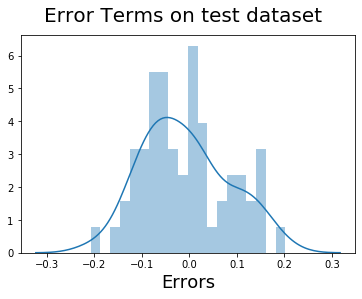

In [145]:
# Plot the histogram of the error terms on the training set
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms on test dataset', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        

## Conclusion: The model fits well on the training as well as test datasets.